In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats


# Task 1: Data Exploration

In [2]:
df=pd.read_csv("C:\\Users\\DELL\\OneDrive\\Desktop\\Project\\loan_sanction_test.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [5]:
df.shape

(367, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [12]:
df.nunique()

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [10]:
# Handling missing values: Fill categorical missing values with mode and numerical with median
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].median(), inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median(), inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace=True)


In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,135.980926,342.822888,0.839237
std,4910.685399,2334.232099,60.959739,64.658402,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


## Extra 

In [27]:
# Outlier Removal using Z-score
z_scores = np.abs(stats.zscore(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]))
df = df[(z_scores < 3).all(axis=1)]

# Feature Engineering: Total Income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Loan_Income_Ratio'] = df['LoanAmount'] / df['Total_Income']


# Task 2: Data Visualization

## Univariate Analysis

In [13]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')
Numerical Variables:
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


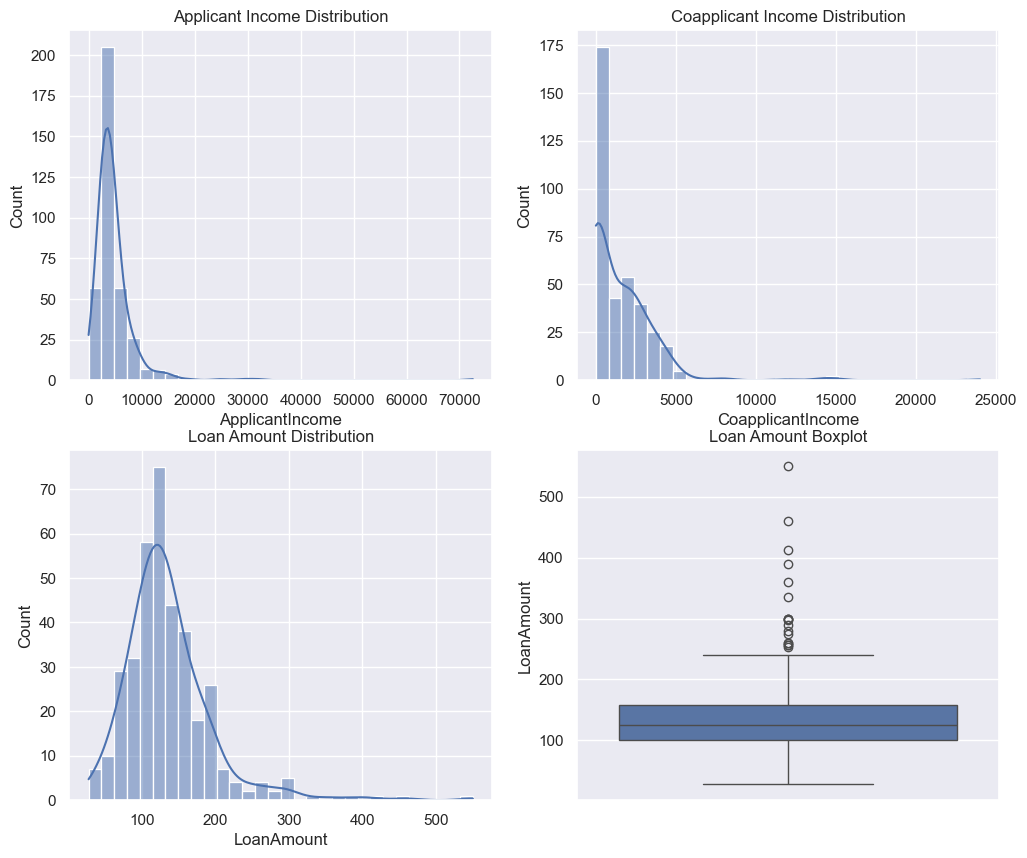

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df["ApplicantIncome"], bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title("Applicant Income Distribution")
sns.histplot(df["CoapplicantIncome"], bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_title("Coapplicant Income Distribution")
sns.histplot(df["LoanAmount"], bins=30, kde=True, ax=axes[1,0])
axes[1,0].set_title("Loan Amount Distribution")
sns.boxplot(y=df["LoanAmount"], ax=axes[1,1])
axes[1,1].set_title("Loan Amount Boxplot")
plt.show()


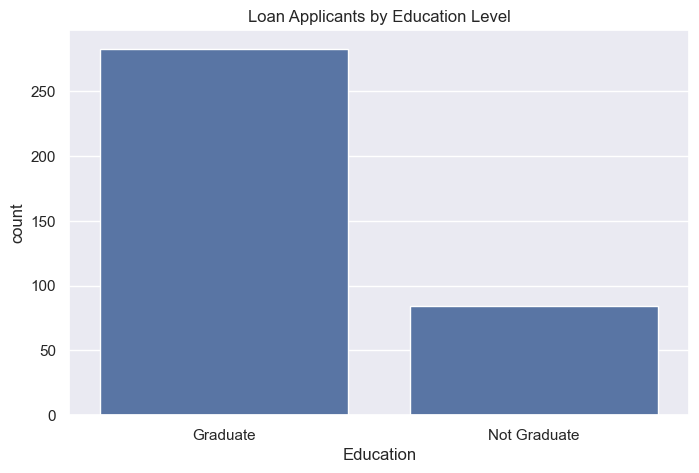

In [19]:
# Categorical Analysis
plt.figure(figsize=(8,5))
sns.countplot(x="Education", data=df)
plt.title("Loan Applicants by Education Level")
plt.show()


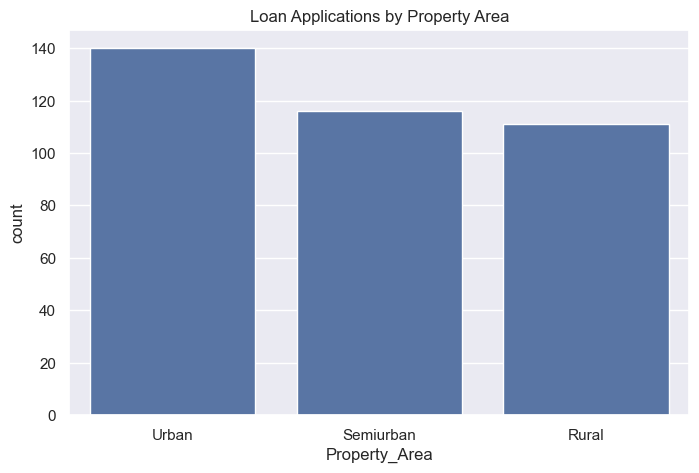

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x="Property_Area", data=df)
plt.title("Loan Applications by Property Area")
plt.show()

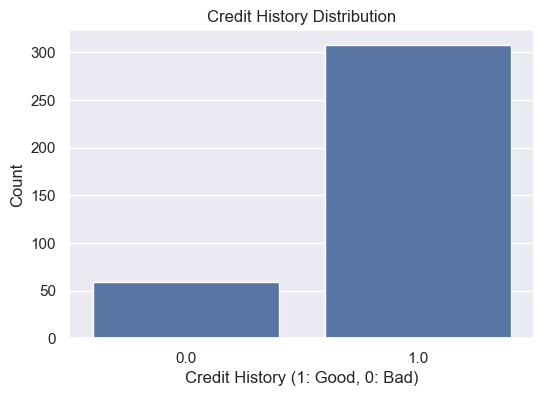

In [17]:
# Plot Credit History distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Credit_History", data=df)
plt.title("Credit History Distribution")
plt.xlabel("Credit History (1: Good, 0: Bad)")
plt.ylabel("Count")
plt.show()

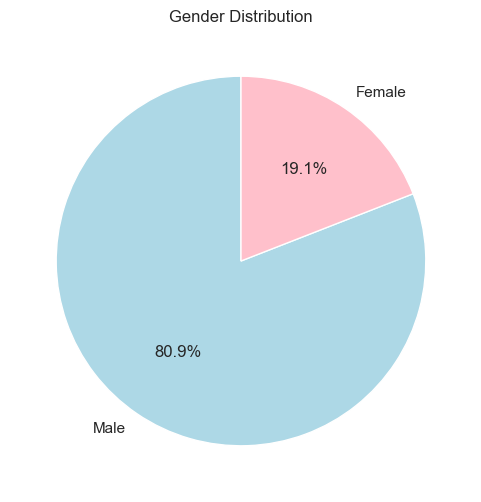

In [21]:
# Pie Chart for Gender Distribution
plt.figure(figsize=(6,6))
df["Gender"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "pink"], startangle=90)
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

## Key Insights 

 Univariate Analysis

1. Income Distribution: Applicant Income and Co-applicant Income are right-skewed, meaning most applicants have lower incomes, but a few earn significantly more.

2. Loan Amount distribution is also right-skewed, indicating most loans are of smaller amounts with some high-value loans.

3. Outliers in Loan Amount: The boxplot of Loan Amount shows significant outliers, meaning some applicants have taken unusually large loans compared to others.

4. Loan Applicants by Education Level:  More loan applicants are graduates than non-graduates.

5. Property Area Distribution: Most loan applicants come from Semi-Urban areas, followed by Urban and Rural areas.

6. Credit History Distribution:  A majority of applicants have a good credit history (1), which increases their chances of loan approval.

7. Gender Distribution:Males dominate the loan applications, with a significantly higher proportion than females.


## Bivariate Analysis

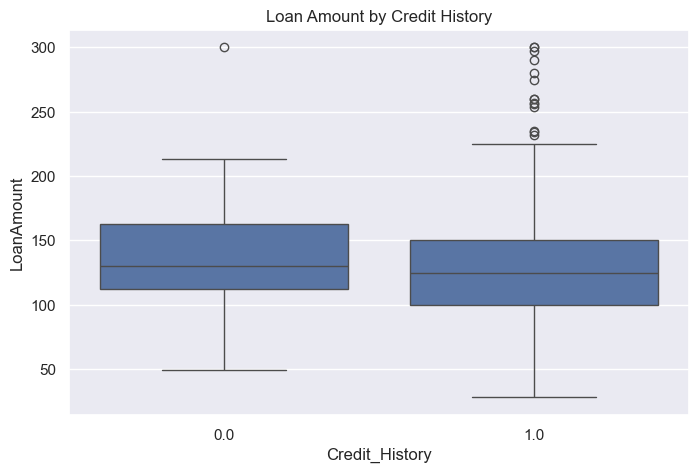

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Credit_History", y="LoanAmount", data=df)
plt.title("Loan Amount by Credit History")
plt.show()

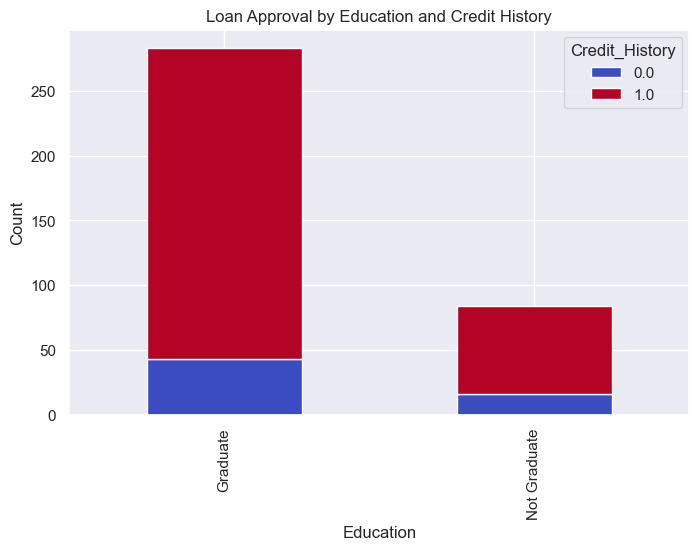

In [25]:
# Stacked Bar Chart for Loan Approval by Education Level and Credit History
edu_credit = pd.crosstab(df["Education"], df["Credit_History"])
edu_credit.plot(kind="bar", stacked=True, figsize=(8,5), colormap="coolwarm")
plt.title("Loan Approval by Education and Credit History")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

 Bivariate Analysis
1. Loan Amount vs Credit History:  Applicants with a good credit history tend to have higher loan amounts approved compared to those with poor credit history.

2. Education vs Credit History (Stacked Bar Chart): Graduates generally have a better credit history compared to non-graduates, which might make them more eligible for higher loans.


## Multivariate Analysis

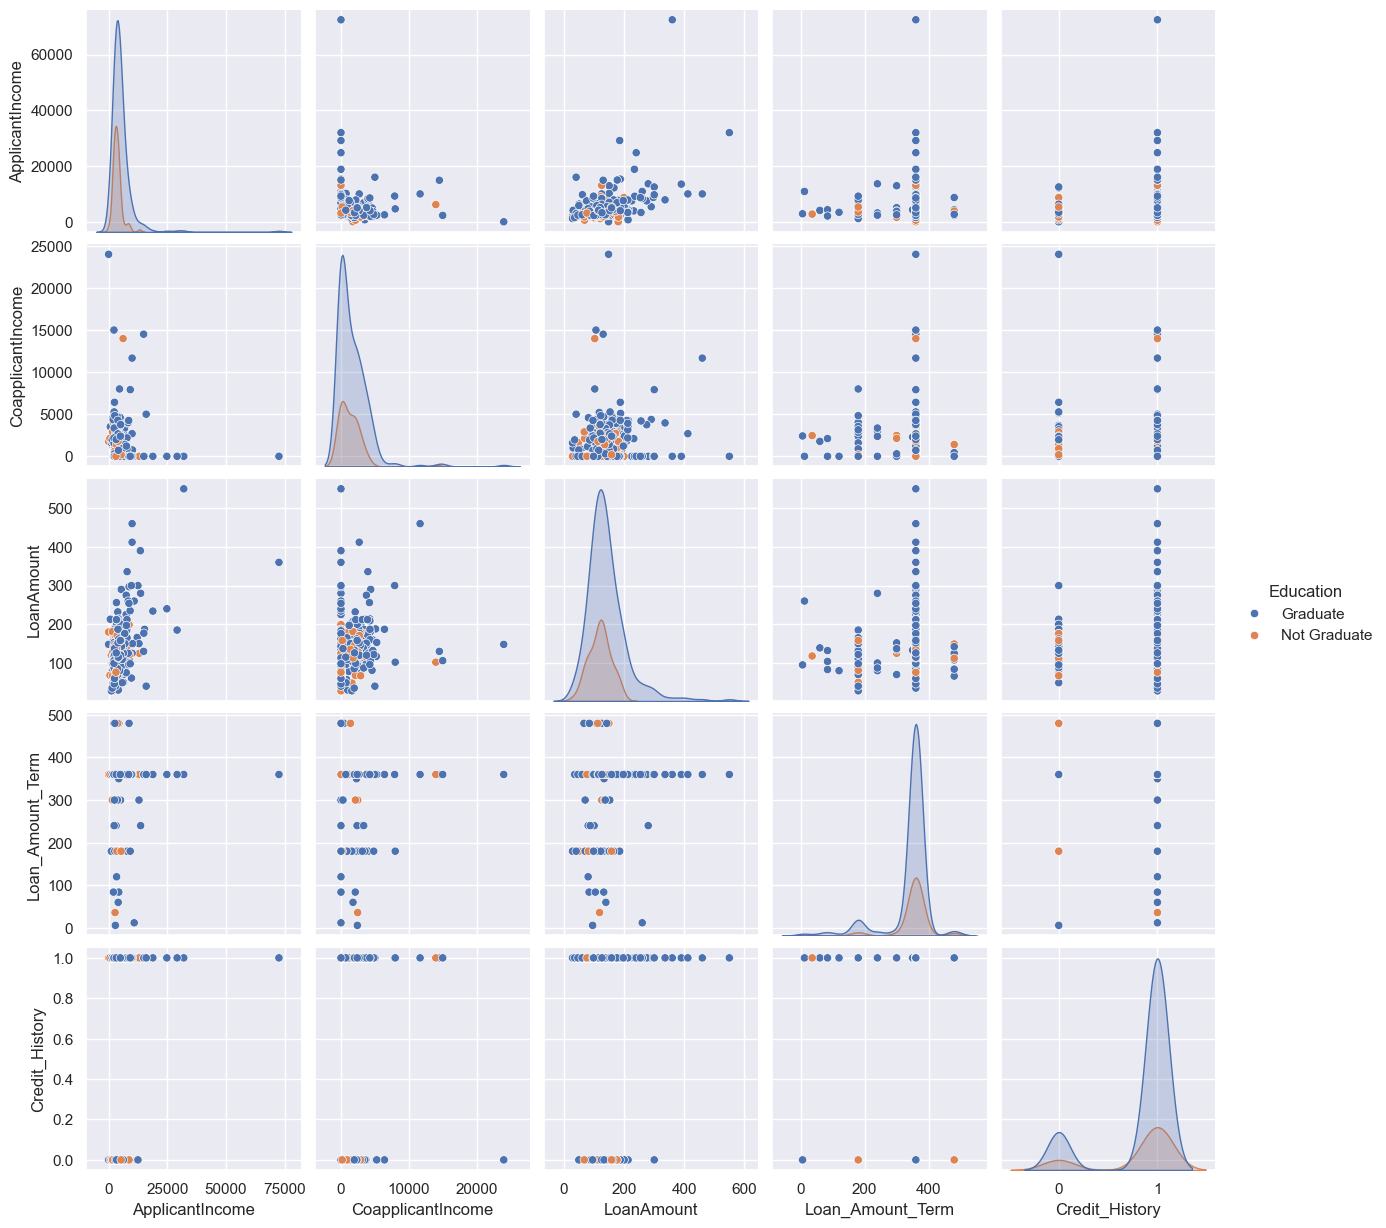

In [23]:
# Pair Plot for Numeric Variables
sns.pairplot(df, hue="Education")
plt.show()

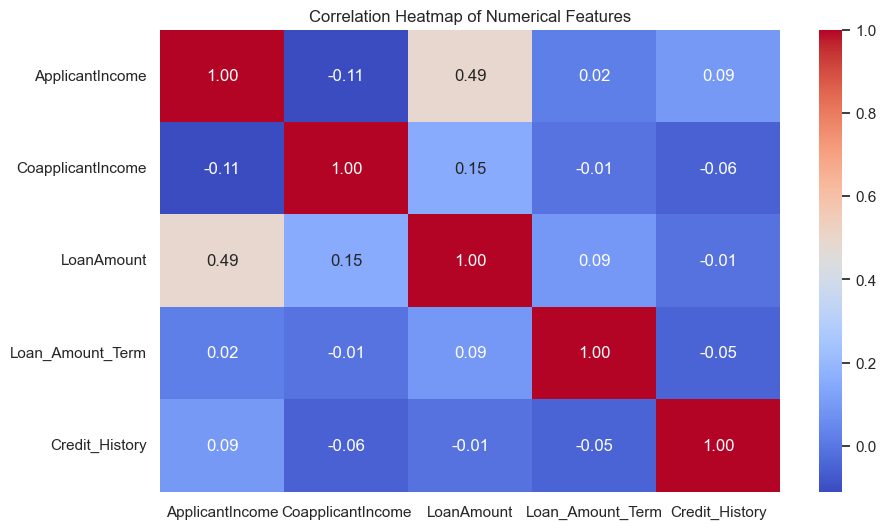

In [22]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


 Multivariate Analysis

1. Correlation Heatmap:There is a weak positive correlation between Applicant Income and Loan Amount, meaning higher-income applicants tend to get slightly larger loans.
Credit History shows a strong positive impact on loan approval.

    
2. Pair Plot Analysis:The scatter plots reveal a clear distinction in income levels and loan amounts based on education and credit history.


# Conclusion

1. Credit history is one of the most important factors in determining loan approval.
2. Higher applicant income generally leads to higher loan amounts, but there are exceptions.
3. Graduates tend to have better credit histories and receive more loan approvals.
4. Semi-urban areas have the highest number of applicants, possibly due to more favorable economic conditions.